In [ ]:
# pip install numpy pandas statsmodels sklearn scipy mord matplotlib seaborn pylab jedi
# install required modules

## importing modules

In [ ]:
import numpy as np
import pandas as pd
# import numpy & pandas

# pip install jedi
# for auto completion
pd.options.display.max_columns=500
pd.options.display.max_rows=200
# to set dataframes to show more cols & rows

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
# import statsmodels for statistical modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importing VIF

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import scikit-learn for machine learning

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
# importing matplotlib & seaborn for plotting graphs

## uploading datasets to google colab

In [ ]:
from google.colab import files
uploaded=files.upload()# application_data.csv

# import os
# os.chdir(r'C:/Users/lootera-ip-win/Downloads/Module 6-AdvancedAnalyticsUsingStatistics (Module-End Exam)')
# os.getcwd()

Saving application_data.csv to application_data.csv


In [ ]:
from google.colab import files
uploaded=files.upload()# previous_application.csv

# import os
# os.chdir(r'C:/Users/lootera-ip-win/Downloads/Module 6-AdvancedAnalyticsUsingStatistics (Module-End Exam)')
# os.getcwd()

Saving previous_application.csv to previous_application.csv


In [ ]:
dfa  = pd.read_csv('application_data.csv')
# loading application_data dataset as DataFrame

In [ ]:
dfp  = pd.read_csv('previous_application.csv')
# loading previous_application dataset as DataFrame

In [ ]:
shpdfa = dfa.shape
shpdfa
# indicates 307511 rows x 122 columns in df_app_data DataFrame

(307511, 122)

In [ ]:
shpdfp = dfp.shape
shpdfp
# indicates 1670214 rows x 37 columns in df_app_data DataFrame

(1670214, 37)

## data cleaning dfa

### filtering dfa (application_data dataset)

In [ ]:
dfa.head(10)
# printing first 10 records from application_data dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### filtering using null value percentage

#### filtering where null value percentage > 45

In [ ]:
nullpct45 = dfa.isnull().sum() / shpdfa[0] * 100
# generating a series of percentages of null value for each column
# by summing all the null values from each column
# it has custom index as column name

In [ ]:
dfadrp45 = nullpct45[nullpct45 > 45].index
# finding the column names by index property which have
# null value percentage > 45%

In [ ]:
dfadrp45.size
# checking count of column which are dropped because their null values are > 45%

49

In [ ]:
dfa1 = dfa.drop(dfadrp45, axis=1)
# dropping the columns which have null value count > 45%

In [ ]:
dfa1.shape
# checking shape of new dataframe
# 307511 rows, 73 cols

(307511, 73)

In [ ]:
shpdfa

(307511, 122)

- now only 73 rows are left to work upon, while actual dataset had 122 rows

In [ ]:
dfa1
# printing new dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [ ]:
dfa1.describe()
# checking description of columns having numerical type

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

#### dropping unwanted columns

In [ ]:
dfa1.columns
# checking column names in DataFrame left behind after removing columns with
# more feasible null values

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
dfa1drpunwanted = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', ]
# creating a list of columns which are unwanted and need to be deleted

In [ ]:
dfa2 = dfa1.drop(dfa1drpunwanted,axis=1)
# dropping unwanted columns and creating a new DataFrame

In [ ]:
dfa2.shape
# checking shape of new DataFrame
# 307511 rows x 43 columns

(307511, 43)

In [ ]:
dfa2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,-828.0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,-617.0,0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,-1106.0,0,0.0


In [ ]:
dfa2.columns
# checking columns left behind after removing unwanted columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_19', 'AMT_REQ_CREDI

#### filling null values

In [ ]:
#checking which clumns have null values
round((100*dfa2.isnull().sum()/len(dfa2)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_CONT_MOBILE                0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
R

#### filling null values CODE_GENDER

In [ ]:
dfa2['CODE_GENDER'].describe()
# getting description of data in column CODE_GENDER

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

In [ ]:
dfa2['CODE_GENDER'].isnull().sum()
# checking null count

0

In [ ]:
dfa2['CODE_GENDER'].unique()
# checking unique values

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
dfa2.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)
# replacing with most-frequent category

In [ ]:
dfa2.CODE_GENDER.value_counts()
# counting unique values

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Text(0, 0.5, 'count')

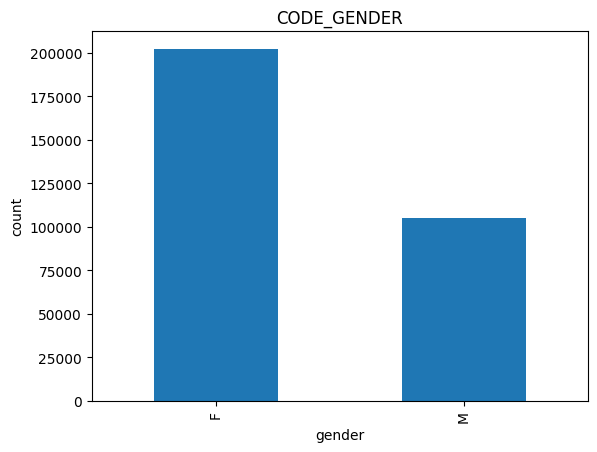

In [ ]:
dfa2['CODE_GENDER'].value_counts().plot(kind='bar')
plt.title('CODE_GENDER')
plt.xlabel('gender')
plt.ylabel('count')
# plotting bar graph for application count based on gender

#### filling null values CNT_FAM_MEMBERS

In [ ]:
dfa2['CNT_FAM_MEMBERS'].describe()
# getting description of data in column CNT_FAM_MEMBERS

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
dfa2['CNT_FAM_MEMBERS'].isnull().sum()
# checking null count

2

In [ ]:
dfa2['CNT_FAM_MEMBERS'].fillna(2, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%           2.000000

In [ ]:
dfa2['CNT_FAM_MEMBERS'].isnull().sum()
# cross-checking null count

0

#### filling null values OBS_60_CNT_SOCIAL_CIRCLE

In [ ]:
dfa2['OBS_60_CNT_SOCIAL_CIRCLE'].describe()
# getting description of data in column OBS_60_CNT_SOCIAL_CIRCLE

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
dfa2['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()
# checking null count

1021

In [ ]:
dfa2['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%           0.000000

In [ ]:
dfa2['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()
# cross-checking null count

0

#### filling null values AMT_ANNUITY

In [ ]:
dfa2['AMT_ANNUITY'].describe()
# getting description of data in column AMT_ANNUITY

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
dfa2['AMT_ANNUITY'].isnull().sum()
# checking null count

12

In [ ]:
dfa2['AMT_ANNUITY'].fillna(24903, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%       24903.000000

In [ ]:
dfa2['AMT_ANNUITY'].isnull().sum()
# cross-checking null count

0

#### filling null values AMT_GOODS_PRICE

In [ ]:
dfa2['AMT_GOODS_PRICE'].describe()
# getting description of data in column AMT_GOODS_PRICE

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
dfa2['AMT_GOODS_PRICE'].isnull().sum()
# checking null count

278

In [ ]:
dfa2['AMT_GOODS_PRICE'].fillna(538396.2, inplace=True)
# taking the mean value to fill NUll values, because data is continuous
# mean     5.383962e+05

In [ ]:
dfa2['AMT_GOODS_PRICE'].isnull().sum()
# cross-checking null count

0

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

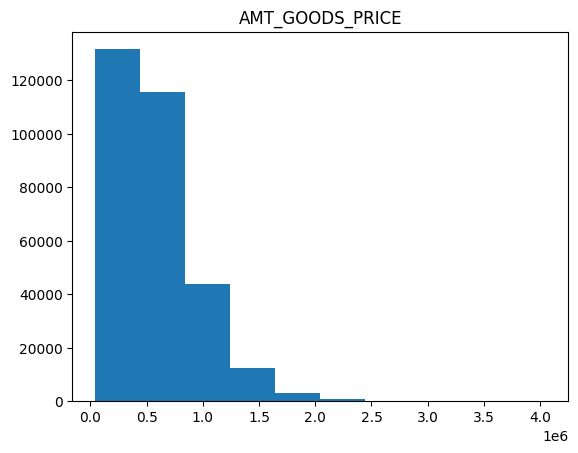

In [ ]:
plt.hist(dfa2['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
# plotting bar graph for application count based on AMT_GOODS_PRICE

#### filling null values NAME_TYPE_SUITE

In [ ]:
dfa2['NAME_TYPE_SUITE'].isnull().sum()
# checking null count

1292

In [ ]:
dfa2['NAME_TYPE_SUITE'].describe()
# getting description of data in column NAME_TYPE_SUITE

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
dfa2['NAME_TYPE_SUITE'].unique()
# getting description of data in column NAME_TYPE_SUITE

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [ ]:
dfa2['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
# filling null values with 'Unaccompanied' as it is the mode value (has highest frequency)

In [ ]:
dfa2['NAME_TYPE_SUITE'].isnull().sum()
# cross-checking null count

0

#### filling null values OCCUPATION_TYPE

In [ ]:
dfa2['OCCUPATION_TYPE'].isnull().sum()
# checking null count

96391

In [ ]:
dfa2['OCCUPATION_TYPE'].describe()
# getting description of data in column OCCUPATION_TYPE

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
dfa2['OCCUPATION_TYPE'].unique()
# getting description of data in column OCCUPATION_TYPE

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [ ]:
dfa2['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)
# filling null values with 'Laborers' as it is the mode value (has highest frequency)

In [ ]:
dfa2['OCCUPATION_TYPE'].isnull().sum()
# cross-checking null count

0

Text(0.5, 1.0, 'OCCUPATION_TYPE_count')

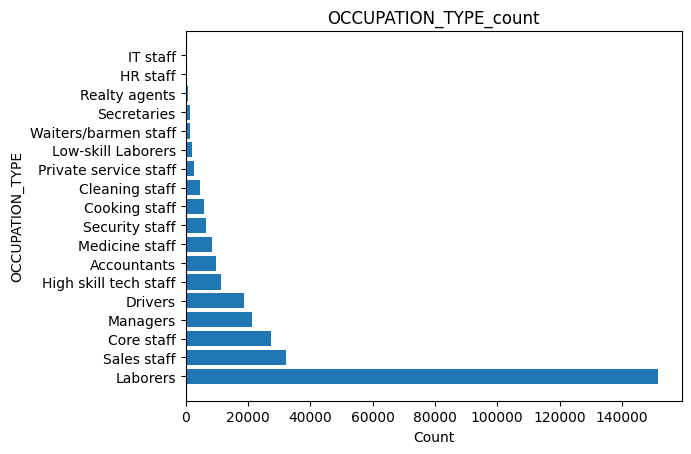

In [ ]:
OCCUPATION_TYPE_count = dfa2['OCCUPATION_TYPE'].value_counts()
plt.barh(OCCUPATION_TYPE_count.index, OCCUPATION_TYPE_count.values)
plt.xlabel("Count")
plt.ylabel("OCCUPATION_TYPE")
plt.title("OCCUPATION_TYPE_count")

#### filling null values AMT_REQ_CREDIT_BUREAU_QRT

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()
# checking null count

41519

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].describe()
# getting description of data in column AMT_REQ_CREDIT_BUREAU_QRT

# Data Imbalance
# it shows that low frequency values are more such that 75th percentile is also zero

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].unique()
# unique values also indicate that people already had a Credit Bureau inquiry within last 8 quarters (or 2 years)

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f428ba6b430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f428ba6be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f428ba6add0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f428babd210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f428babdd20>],
 'means': []}

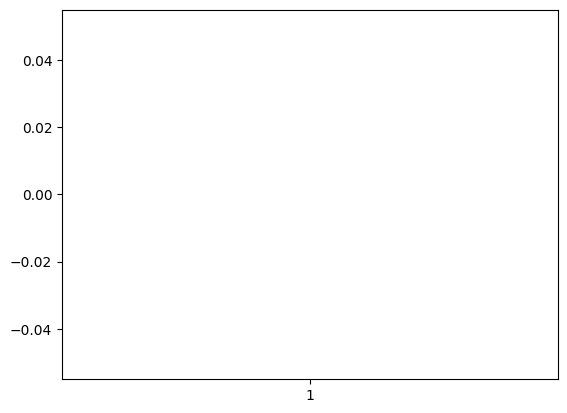

In [ ]:
plt.boxplot([dfa2['AMT_REQ_CREDIT_BUREAU_QRT']])
# box plots for AMT_REQ_CREDIT_BUREAU_QRT

# Data Imbalance is indicated here as no box-plot is diminished
# it is not showing any box plot, because frequency of low values is overpowering frequency of high values
# so we need to take a look at histogram of this data

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].describe()
# getting description of data in column AMT_REQ_CREDIT_BUREAU_QRT
# note that, although 75th percentile has now changed to value 1,
# but we cannot risk company's loss by issuing credit to a person whose credit history is unknown

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Text(0.5, 1.0, 'AMT_REQ_CREDIT_BUREAU_QRT')

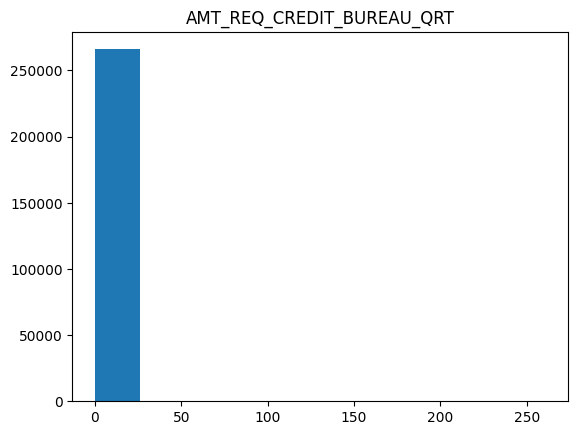

In [ ]:
plt.hist(dfa2['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('AMT_REQ_CREDIT_BUREAU_QRT')
# plotting bar graph for application count based on AMT_REQ_CREDIT_BUREAU_QRT
# shows very high frequency of low values
# and negligible frequency of high values

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(1, inplace=True)
# filling NUll values with value 0 means none of the people already had an enquiry within last one quarter which would be misleading
# so lets fill null values with value 1, which would mean person already had an enquiry within last quarter, putting company on a safe side
# here no of quarters is discrete data

In [ ]:
dfa2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()
# cross-checking null count

0

Text(0.5, 1.0, 'AMT_REQ_CREDIT_BUREAU_QRT')

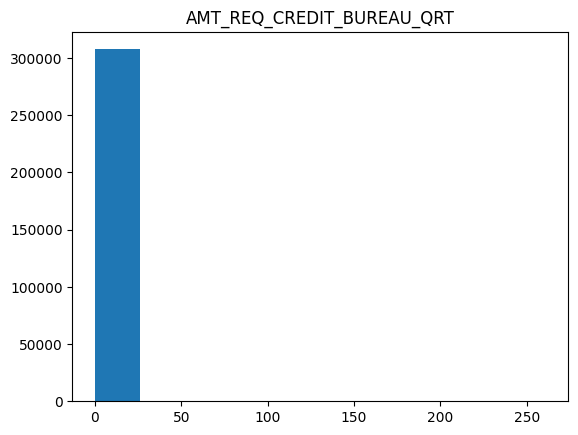

In [ ]:
plt.hist(dfa2['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('AMT_REQ_CREDIT_BUREAU_QRT')
# plotting bar graph for application count based on AMT_REQ_CREDIT_BUREAU_QRT

#### filling null values DAYS_LAST_PHONE_CHANGE

In [ ]:
dfa2['DAYS_LAST_PHONE_CHANGE'].describe()
# getting description of data in column DAYS_LAST_PHONE_CHANGE

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [ ]:
dfa2['DAYS_LAST_PHONE_CHANGE'].isnull().sum()
# checking null count

1

In [ ]:
dfa2['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)
# filling null values with 0 for DAYS_LAST_PHONE_CHANGE as if score is not available,
# it is treated as zero, not mean/median/min value

In [ ]:
dfa2['DAYS_LAST_PHONE_CHANGE'].isnull().sum()
# cross-checking null count

0

#### filling null values EXT_SOURCE_2 & EXT_SOURCE_3

In [ ]:
dfa2['EXT_SOURCE_2'].describe()
# getting description of data in column EXT_SOURCE_2

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [ ]:
dfa2['EXT_SOURCE_2'].isnull().sum()
# checking null count

660

In [ ]:
dfa2['EXT_SOURCE_2'].fillna(0, inplace=True)
# filling null values with 0 for EXT_SCORE as if score is not available,
# it is treated as zero, not mean/median/min value

In [ ]:
dfa2['EXT_SOURCE_2'].isnull().sum()
# cross-checking null count

0

Text(0.5, 1.0, 'EXT_SOURCE_2')

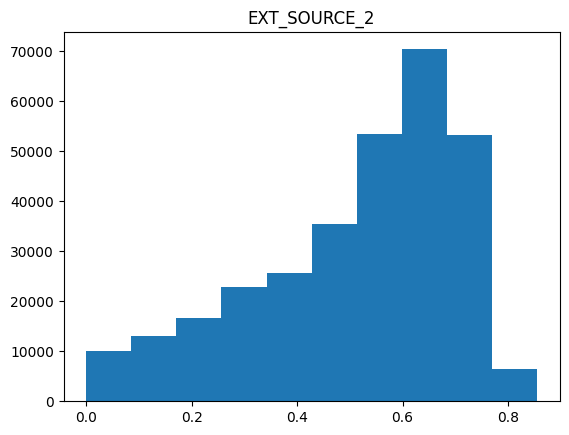

In [ ]:
plt.hist(dfa2['EXT_SOURCE_2'])
plt.title('EXT_SOURCE_2')
# plotting bar graph for application count based on EXT_SOURCE_2

In [ ]:
dfa2['EXT_SOURCE_3'].describe()
# getting description of data in column EXT_SCORE_3

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [ ]:
dfa2['EXT_SOURCE_3'].isnull().sum()
# checking null count

60965

In [ ]:
dfa2['EXT_SOURCE_3'].fillna(0, inplace=True)
# filling null values with 0 for EXT_SCORE as if score is not available,
# it is treated as zero, not mean/median/min value

In [ ]:
dfa2['EXT_SOURCE_3'].isnull().sum()
# cross-checking null count

0

Text(0.5, 1.0, 'EXT_SOURCE_3')

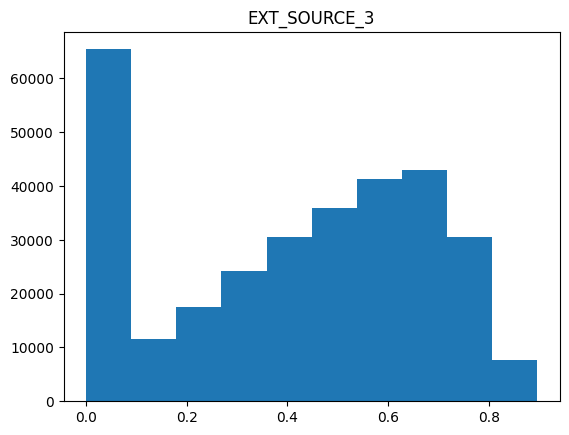

In [ ]:
plt.hist(dfa2['EXT_SOURCE_3'])
plt.title('EXT_SOURCE_3')
# plotting bar graph for application count based on EXT_SOURCE_3

{'whiskers': [<matplotlib.lines.Line2D at 0x7f426a8e8fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f426a8e94e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f426a8e8d00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f426a8e9a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f426a8e9cc0>,
 'means': []}

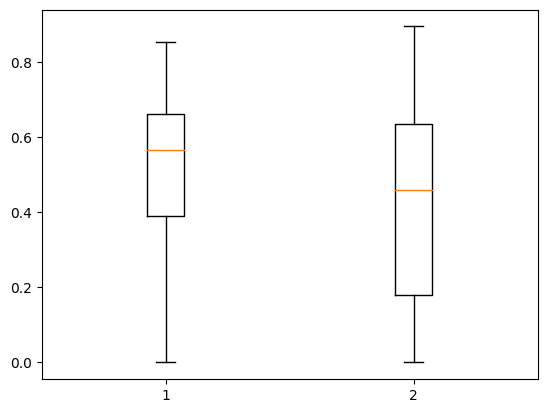

In [ ]:
plt.boxplot([dfa2['EXT_SOURCE_2'], dfa2['EXT_SOURCE_3']])
# box plots for EXT_SOURCE_2 & EXT_SOURCE_3

#### convert negative values for days to positive days

In [ ]:
neg_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
# creating a list of columns with negative values of days,
# which might cause issues while calculating statistical values like mean, S.D. etc
dfa2[neg_cols] = dfa2[neg_cols].abs()
dfa2[neg_cols].describe()
# getting description of data in columns with negative values
# to see what statistical values it shows after conversion

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.855657
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808966
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f426a94cdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f426a94d300>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f426a94cb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f426a94d840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f426a94dae0>],
 'means': []}

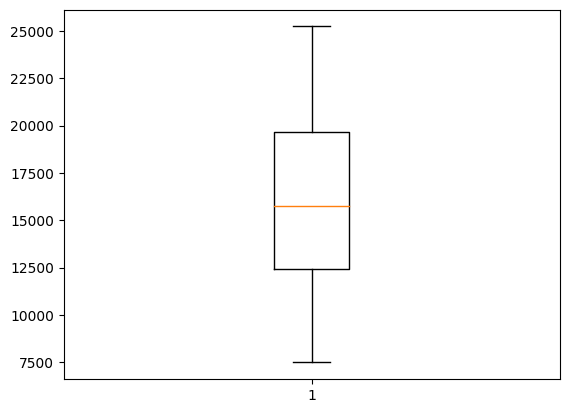

In [ ]:
plt.boxplot([dfa2['DAYS_BIRTH']])
# box plots for DAYS_BIRTH

{'whiskers': [<matplotlib.lines.Line2D at 0x7f426a7bcbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f426a7bd120>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f426a7bc940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f426a7bd660>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f426a7bd900>],
 'means': []}

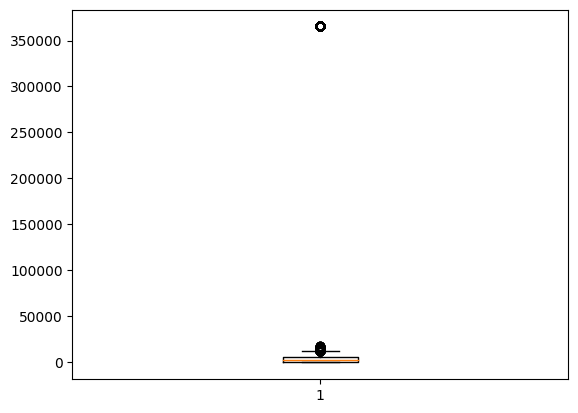

In [ ]:
plt.boxplot([dfa2['DAYS_EMPLOYED']])
# box plots for DAYS_EMPLOYED

{'whiskers': [<matplotlib.lines.Line2D at 0x7f426a830e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f426a831270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f426a830bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f426a8317b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f426a831a50>],
 'means': []}

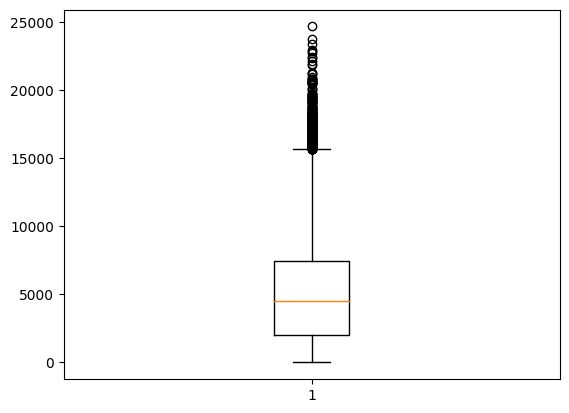

In [ ]:
plt.boxplot([dfa2['DAYS_REGISTRATION']])
# box plots for DAYS_REGISTRATION

# Outliers
# it shows a lot of values as outliers, means that people registered 15000 days
# earlier when they applied for loan

{'whiskers': [<matplotlib.lines.Line2D at 0x7f426a687730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f426a687c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f426a687490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f426a6c0220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f426a6c04c0>],
 'means': []}

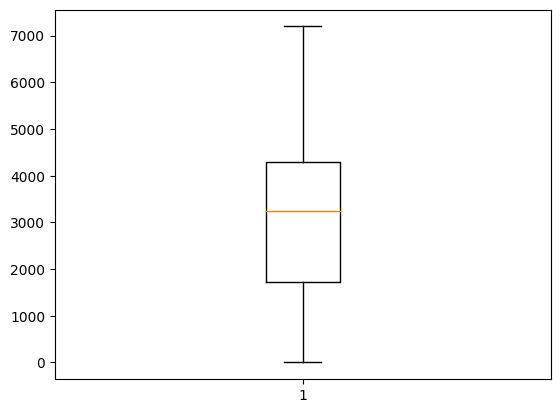

In [ ]:
plt.boxplot([dfa2['DAYS_ID_PUBLISH']])
# box plots for DAYS_ID_PUBLISH

In [ ]:
round((100*dfa2.isnull().sum()/len(dfa2)),2)
#checking data set again for any column with feasible null values that need to be filled

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_CONT_MOBILE               0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS

In [ ]:
dfa2.isnull().sum()
#checking data set again for any column with feasible null values that need to be filled

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [ ]:
dfa2.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_CONT_MOBILE                 int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS          

## data cleaning dfp

### filtering dfp (previous_application dataset)

In [ ]:
dfp.head(10)
# printing first 10 records from previous_application dataset

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


#### filtering using null value percentage

#### filtering where null value percentage > 45

In [ ]:
nullpctdfp45 = dfp.isnull().sum() / shpdfp[0] * 100
# generating a series of percentages of null value for each column
# by summing all the null values from each column
# it has custom index as column name

In [ ]:
dfpdrp45 = nullpctdfp45[nullpctdfp45 > 45].index
# finding the column names by index property which have
# null value percentage > 45%

In [ ]:
dfpdrp45.size
# checking count of column which are dropped because their null values are > 45%

5

In [ ]:
dfp1 = dfp.drop(dfpdrp45, axis=1)
# dropping the columns which have null value count > 45%

In [ ]:
dfp1.shape
# checking shape of new dataframe
# 1670214 rows, 32 cols

(1670214, 32)

In [ ]:
shpdfp

(1670214, 37)

- now only 32 rows are left to work upon, while actual dataset had 37 rows

#### dropping unwanted columns

In [ ]:
dfp1
# printing new dataframe

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [ ]:
dfp1.describe()
# checking description of columns having numerical type

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
dfp1.columns
# checking column names in DataFrame left behind after removing columns with
# more feasible null values

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
dfp1drpunwanted = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
# creating a list of columns which are unwanted and need to be deleted

In [ ]:
dfp2 = dfp1.drop(dfp1drpunwanted,axis=1)
# dropping unwanted columns and creating a new DataFrame

In [ ]:
dfp2.shape
# checking shape of new DataFrame
# 1670214 rows x 16 columns

(1670214, 16)

In [ ]:
dfp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Approved,-73,XAP,12.0,-42.0,300.0,-42.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Approved,-164,XAP,36.0,-134.0,916.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Approved,-301,XAP,12.0,-271.0,59.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Approved,-512,XAP,12.0,-482.0,-152.0,-182.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Refused,-781,HC,24.0,NaN,NaN,NaN


In [ ]:
dfp2.columns
# checking columns left behind after removing unwanted columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE'],
      dtype='object')

#### filling null values

In [ ]:
#checking which clumns have null values
round((100*dfp2.isnull().sum()/len(dfp2)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
CODE_REJECT_REASON             0.00
CNT_PAYMENT                   22.29
DAYS_FIRST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_LAST_DUE                 40.30
dtype: float64

In [ ]:
dfp2.head(15)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Approved,-73,XAP,12.0,-42.0,300.0,-42.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Approved,-164,XAP,36.0,-134.0,916.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Approved,-301,XAP,12.0,-271.0,59.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Approved,-512,XAP,12.0,-482.0,-152.0,-182.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Refused,-781,HC,24.0,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Approved,-684,XAP,18.0,-654.0,-144.0,-144.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Canceled,-14,XAP,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Canceled,-21,XAP,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Canceled,-386,XAP,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Canceled,-57,XAP,NaN,NaN,NaN,NaN


#### filling null values AMT_ANNUITY

In [ ]:
dfp2['AMT_ANNUITY'].describe()
# getting description of data in column AMT_ANNUITY

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [ ]:
dfp2['AMT_ANNUITY'].isnull().sum()
# checking null count

372235

In [ ]:
dfp2['AMT_ANNUITY'].fillna(15955.12, inplace=True)
# taking the mean value to fill NUll values, because data is continuous
# mean     1.595512e+04

In [ ]:
dfp2['AMT_ANNUITY'].isnull().sum()
# cross-checking null count

0

#### filling null values AMT_GOODS_PRICE

In [ ]:
dfp2['AMT_GOODS_PRICE'].describe()
# getting description of data in column AMT_GOODS_PRICE

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
dfp2['AMT_GOODS_PRICE'].isnull().sum()
# checking null count

385515

In [ ]:
dfp2['AMT_GOODS_PRICE'].fillna(112320.0, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%      1.123200e+05

In [ ]:
dfp2['AMT_GOODS_PRICE'].isnull().sum()
# cross-checking null count

0

#### filling null values CNT_PAYMENT

In [ ]:
dfp2['CNT_PAYMENT'].describe()
# getting description of data in column CNT_PAYMENT

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [ ]:
dfp2['CNT_PAYMENT'].isnull().sum()
# checking null count

372230

In [ ]:
dfp2['CNT_PAYMENT'].fillna(12, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%      1.200000e+01

In [ ]:
dfp2['CNT_PAYMENT'].isnull().sum()
# cross-checking null count

0

#### convert negative values for days to positive days

In [ ]:
dfp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Approved,-73,XAP,12.0,-42.0,300.0,-42.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Approved,-164,XAP,36.0,-134.0,916.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Approved,-301,XAP,12.0,-271.0,59.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Approved,-512,XAP,12.0,-482.0,-152.0,-182.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Refused,-781,HC,24.0,NaN,NaN,NaN


In [ ]:
neg_cols = ['DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE']
# creating a list of columns with negative values of days,
# which might cause issues while calculating statistical values like mean, S.D. etc
dfp2[neg_cols] = dfp2[neg_cols].abs()
dfp2[neg_cols].describe()
# getting description of data in columns with negative values
# to see what statistical values it shows after conversion

,DAYS_DECISION,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE
count,1.670214e+06,997149.000000,997149.000000,997149.000000
mean,8.806797e+02,15949.224065,35163.363265,78152.730207
std,7.790997e+02,72007.270877,106405.950190,148833.342466
min,1.000000e+00,2.000000,0.000000,2.000000
25%,2.800000e+02,475.000000,257.000000,455.000000
50%,5.810000e+02,921.000000,741.000000,1155.000000
75%,1.300000e+03,1825.000000,1735.000000,2418.000000
max,2.922000e+03,365243.000000,365243.000000,365243.000000


#### filling null values DAYS_FIRST_DUE

In [ ]:
dfp2['DAYS_FIRST_DUE'].describe()
# getting description of data in column DAYS_FIRST_DUE

count    997149.000000
mean      15949.224065
std       72007.270877
min           2.000000
25%         475.000000
50%         921.000000
75%        1825.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [ ]:
dfp2['DAYS_FIRST_DUE'].isnull().sum()
# checking null count

673065

In [ ]:
dfp2['DAYS_FIRST_DUE'].fillna(921, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%         921.000000

In [ ]:
dfp2['DAYS_FIRST_DUE'].isnull().sum()
# cross-checking null count

0

#### filling null values DAYS_LAST_DUE_1ST_VERSION

In [ ]:
dfp2['DAYS_LAST_DUE_1ST_VERSION'].describe()
# getting description of data in column DAYS_LAST_DUE_1ST_VERSION

count    997149.000000
mean      35163.363265
std      106405.950190
min           0.000000
25%         257.000000
50%         741.000000
75%        1735.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [ ]:
dfp2['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()
# checking null count

673065

In [ ]:
dfp2['DAYS_LAST_DUE_1ST_VERSION'].fillna(741, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%         741.000000

In [ ]:
dfp2['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()
# cross-checking null count

0

#### filling null values DAYS_LAST_DUE

In [ ]:
dfp2['DAYS_LAST_DUE'].describe()
# getting description of data in column DAYS_LAST_DUE

count    997149.000000
mean      78152.730207
std      148833.342466
min           2.000000
25%         455.000000
50%        1155.000000
75%        2418.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [ ]:
dfp2['DAYS_LAST_DUE'].isnull().sum()
# checking null count

673065

In [ ]:
dfp2['DAYS_LAST_DUE'].fillna(1155, inplace=True)
# taking the median value to fill NUll values, because data is discrete
# 50%        1155.000000

In [ ]:
dfp2['DAYS_LAST_DUE'].isnull().sum()
# cross-checking null count

0

#### cross checking if any columns have null values

In [ ]:
# cross checking if any columns have null values
round((100*dfp2.isnull().sum()/len(dfp2)),2)

SK_ID_PREV                    0.0
SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
AMT_ANNUITY                   0.0
AMT_APPLICATION               0.0
AMT_CREDIT                    0.0
AMT_GOODS_PRICE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
HOUR_APPR_PROCESS_START       0.0
NAME_CONTRACT_STATUS          0.0
DAYS_DECISION                 0.0
CODE_REJECT_REASON            0.0
CNT_PAYMENT                   0.0
DAYS_FIRST_DUE                0.0
DAYS_LAST_DUE_1ST_VERSION     0.0
DAYS_LAST_DUE                 0.0
dtype: float64

- now dfp is clean as new data frame: dfp2

## Description

In [ ]:
dfa2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,1134.0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,828.0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,815.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,617.0,0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,1106.0,0,0.0


In [ ]:
dfa2.describe()
# shows min, max, median, mean, std for numerical columns in Data Set

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.998133,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.513289,0.409575,1.400626,962.855657,0.000595,0.364647
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692794e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.043164,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.192334,0.268177,2.377224,826.808966,0.024387,0.780002
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390782,0.178760,0.000000,274.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565467,0.459690,0.000000,757.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.663422,0.636376,2.000000,1570.000000,0.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.855000,0.896010,344.000000,4292.000000,1.000000,261.000000


## Inferential Test : one-Sample z-test

In [ ]:
ztest_sample = dfa2[20:25]
# creating sample from dfda2

In [ ]:
dfa2['AMT_INCOME_TOTAL'].mean()
# population mean of AMT_INCOME_TOTAL column

168797.9192969845

- ```Hₒ``` : ```dfa2['AMT_INCOME_TOTAL']mean()``` >= 16000
- ```Hᴀ``` / ```H1``` : ```dfa2['AMT_INCOME_TOTAL']mean()``` < 16000

In [ ]:
statsmodels.stats.weightstats.ztest(ztest_sample['AMT_INCOME_TOTAL'], value=16000, alternative='smaller')
# returns Z-Statistics & P-Value

(2.847110744806187, 0.99779409941542)

```p-Value = 0.99779409941542``` > ```0.05``` means that ```Hₒ``` is rejected, so mean is greater than 16000

## Correlation

### Correlation for application dataset

<ipython-input-296-fabcee08eab2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dfa2.corr())


<Axes: >

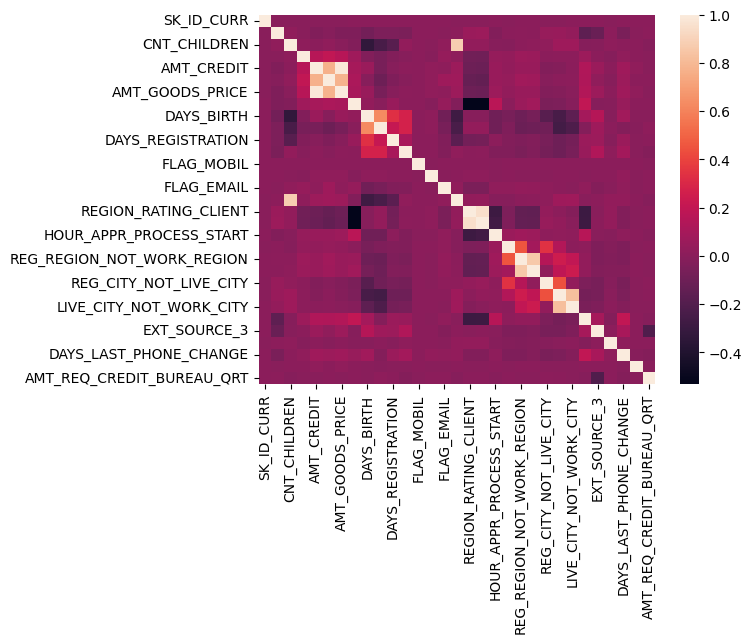

In [ ]:
# sb.heatmap(dfa2.corr(), annot=True)
sb.heatmap(dfa2.corr())
# plotting heatmap using correlation between different columns of dfa2

### Correlation for previous_application dataset

<ipython-input-297-4d633ff16119>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dfp2.corr())


<Axes: >

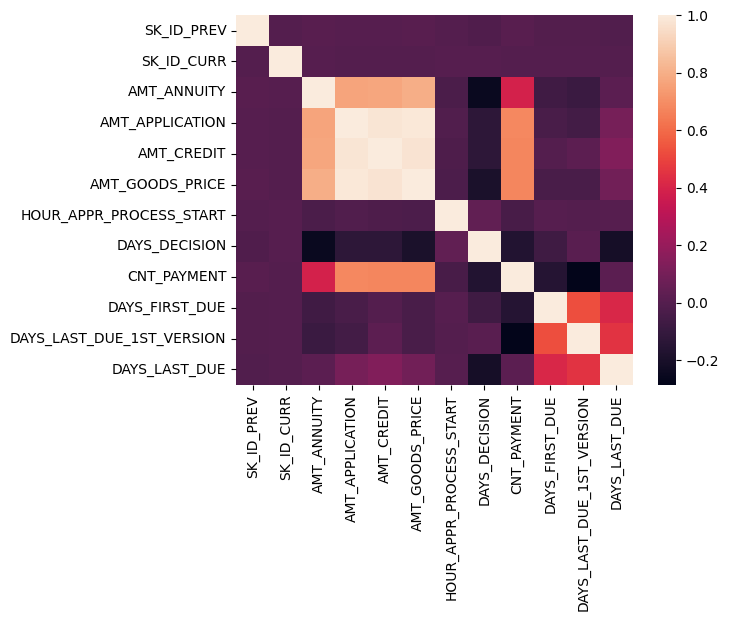

In [ ]:
# sb.heatmap(dfp2.corr(), annot=True)
sb.heatmap(dfp2.corr())
# plotting heatmap using correlation between different columns of dfp2

## univariate analysis

In [ ]:
dfa2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_19', 'AMT_REQ_CREDI

Text(0.5, 1.0, 'CODE_GENDER')

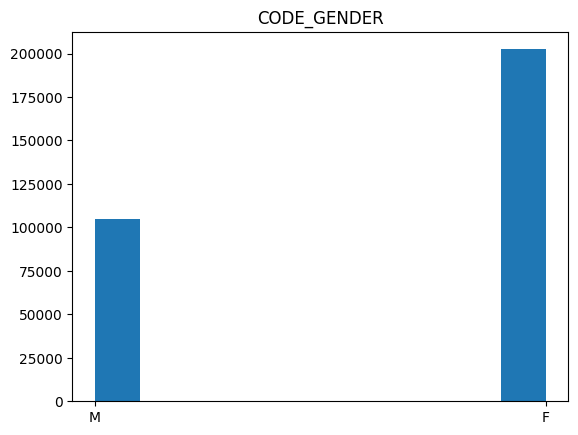

In [ ]:
plt.hist(dfa2['CODE_GENDER'])
# plt.bar(dfa2['CODE_GENDER'], dfa2['AMT_INCOME_TOTAL'])
plt.title('CODE_GENDER')
# plotting bar graph for application count based on CODE_GENDER
# shows count of values for CODE_GENDER column

## Bi-Variate analysis

In [ ]:
dfa2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,1134.0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,828.0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,815.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,617.0,0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,1106.0,0,0.0


Text(0.5, 1.0, 'CNT_FAM_MEMBERS vs AMT_CREDIT scatter plot')

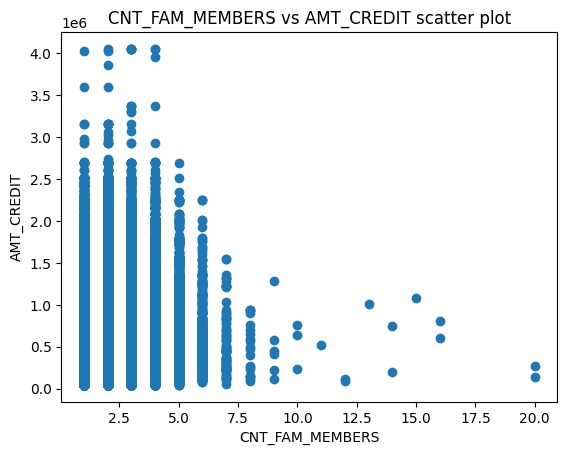

In [ ]:
plt.scatter(x=dfa2['CNT_FAM_MEMBERS'], y=dfa2['AMT_CREDIT'])
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('AMT_CREDIT')
title('CNT_FAM_MEMBERS vs AMT_CREDIT scatter plot')
# dfa2['CNT_FAM_MEMBERS'].describe()
# dfa2['AMT_CREDIT'].describe()

# plotting scatter graph for CNT_FAM_MEMBERS vs. AMT_CREDIT
# as per bi-variate analysis between applicants with less number of family members
# apply for lesser amounts of loans
# Alternatively, people applying for huge loans belong to nuclear families


## Logistic regression prediction

In [ ]:
dfa2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,1134.0,0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.000000,1.0,828.0,0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,815.0,0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.000000,2.0,617.0,0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.000000,0.0,1106.0,0,0.0


In [ ]:
dfa2.columns
# checking columns in DataFrame to pick up response & predictors

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_19', 'AMT_REQ_CREDI

In [ ]:
dfa2['TARGET'].describe()
# it has min=0 & max=1, seems like binary column

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [ ]:
dfa2['TARGET'].unique()
# confirms  that TARGET column, which is response, has binary repsonse,
# so binary logistic regression can be used

array([1, 0])

In [ ]:
for co in dfa2.columns:
    print(co, '\t\t\t', dfa2[co].dtype)

SK_ID_CURR 			 int64
TARGET 			 int64
NAME_CONTRACT_TYPE 			 object
CODE_GENDER 			 object
FLAG_OWN_CAR 			 object
FLAG_OWN_REALTY 			 object
CNT_CHILDREN 			 int64
AMT_INCOME_TOTAL 			 float64
AMT_CREDIT 			 float64
AMT_ANNUITY 			 float64
AMT_GOODS_PRICE 			 float64
NAME_TYPE_SUITE 			 object
NAME_INCOME_TYPE 			 object
NAME_EDUCATION_TYPE 			 object
NAME_FAMILY_STATUS 			 object
NAME_HOUSING_TYPE 			 object
REGION_POPULATION_RELATIVE 			 float64
DAYS_BIRTH 			 int64
DAYS_EMPLOYED 			 int64
DAYS_REGISTRATION 			 float64
DAYS_ID_PUBLISH 			 int64
FLAG_MOBIL 			 int64
FLAG_CONT_MOBILE 			 int64
FLAG_EMAIL 			 int64
OCCUPATION_TYPE 			 object
CNT_FAM_MEMBERS 			 float64
REGION_RATING_CLIENT 			 int64
REGION_RATING_CLIENT_W_CITY 			 int64
WEEKDAY_APPR_PROCESS_START 			 object
HOUR_APPR_PROCESS_START 			 int64
REG_REGION_NOT_LIVE_REGION 			 int64
REG_REGION_NOT_WORK_REGION 			 int64
LIVE_REGION_NOT_WORK_REGION 			 int64
REG_CITY_NOT_LIVE_CITY 			 int64
REG_CITY_NOT_WORK_CITY 			 int64
LIV

In [ ]:
dfa2 = dfa2.astype({'AMT_CREDIT': int, 'AMT_ANNUITY': int, 'AMT_GOODS_PRICE': int, 'REGION_POPULATION_RELATIVE': int, 'DAYS_REGISTRATION': int, 'OBS_60_CNT_SOCIAL_CIRCLE': int, 'AMT_REQ_CREDIT_BUREAU_QRT': int})
# changing float types to int

In [ ]:
predlist = ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_QRT']
# selecting predictor columns which are numerical data

### 4-way split using train_test_split()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dfa2[predlist], dfa2['TARGET'], test_size=.025)
# creating 4-way split for training & testing dataset

In [ ]:
x_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_QRT
305780,454279,0,30150.0,225000,9531,225000,365243,1
184719,314111,0,94500.0,545040,20677,450000,365243,0
239976,377893,1,180000.0,1133748,36702,990000,440,0
252912,392651,2,81000.0,360000,17640,360000,505,2
278252,422385,0,189000.0,417708,30523,369000,365243,1


In [ ]:
for co in x_train.columns:
    print(co, '\t\t\t', x_train[co].dtype)

SK_ID_CURR 			 int64
CNT_CHILDREN 			 int64
AMT_INCOME_TOTAL 			 float64
AMT_CREDIT 			 int64
AMT_ANNUITY 			 int64
AMT_GOODS_PRICE 			 int64
DAYS_EMPLOYED 			 int64
AMT_REQ_CREDIT_BUREAU_QRT 			 int64


In [ ]:
y_train.head()

305780    0
184719    0
239976    1
252912    0
278252    0
Name: TARGET, dtype: int64

### creating model Binary Logistic Model

In [ ]:
mod1 = sm.OLS(y_train, x_train).fit()
print(mod1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TARGET   R-squared (uncentered):                   0.079
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              3233.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                        0.00
Time:                        11:57:34   Log-Likelihood:                         -35506.
No. Observations:              299823   AIC:                                  7.103e+04
Df Residuals:                  299815   BIC:                                  7.111e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------